In [175]:
#importando biblioteca
import pandas as pd
import matplotlib.pyplot as plt

plt.style.use("seaborn")

In [155]:
#Upload do arquivo
from google.colab import files
arquivo = files.upload()

In [176]:

#Criando nosso Dataframe
dt = pd.read_excel(r"/content/AdventureWorks.xlsx")

In [177]:
# Visualizando as 5 primeiras linhas 
dt.head(5)

,Data Venda,Data Envio,ID Loja,ID Produto,ID Cliente,No. Venda,Custo Unitário,Preço Unitário,Quantidade,Valor Desconto,Valor Venda,Produto,Fabricante,Marca,Classe,Cor
0,2008-05-09,2008-05-29,199,384,18839,200805093CS607,348.58,758.00,6,0.00,"4,548.00",Adventure Works Laptop15.4W M1548 Red,Adventure Works,Adventure Works,Regular,Red
1,2008-05-12,2008-05-17,306,384,19051,200805123CS567,348.58,758.00,6,0.00,"4,548.00",Adventure Works Laptop15.4W M1548 Red,Adventure Works,Adventure Works,Regular,Red
2,2008-05-14,2008-05-20,306,384,19052,200805143CS576,348.58,758.00,6,0.00,"4,548.00",Adventure Works Laptop15.4W M1548 Red,Adventure Works,Adventure Works,Regular,Red
3,2008-05-21,2008-05-27,306,384,19052,200805213CS576,348.58,758.00,6,0.00,"4,548.00",Adventure Works Laptop15.4W M1548 Red,Adventure Works,Adventure Works,Regular,Red
4,2008-06-20,2008-06-27,306,384,19053,200806203CS586,348.58,758.00,6,0.00,"4,548.00",Adventure Works Laptop15.4W M1548 Red,Adventure Works,Adventure Works,Regular,Red


In [178]:
#Quantidade de linhas e colunas
print(dt.shape)

(904, 16)


In [11]:
#Verificando os tipos de dados
print(dt.dtypes)

Data Venda        datetime64[ns]
Data Envio        datetime64[ns]
ID Loja                    int64
ID Produto                 int64
ID Cliente                 int64
No. Venda                 object
Custo Unitário           float64
Preço Unitário           float64
Quantidade                 int64
Valor Desconto           float64
Valor Venda              float64
Produto                   object
Fabricante                object
Marca                     object
Classe                    object
Cor                       object
dtype: object


In [17]:
# Qual é o total da receita ?
print(dt['Valor Venda'].sum())


5984606.1426


In [179]:
# Agora que temos a receita e total , todemos achar o lucro total 
# vamos criar a coluna lucro que vai ser [venda] - [custo]

dt['lucro'] = dt['Valor Venda'] - dt['Custo Unitário']
print(dt['lucro'])

0                 4,199.42
1                 4,199.42
2                 4,199.42
3                 4,199.42
4                 4,199.42
              ...         
899               5,243.43
900               4,379.31
901               4,379.31
902               4,464.21
903               4,379.31
Name: lucro, Length: 904, dtype: float64


In [180]:
from numpy.core.fromnumeric import around
#Total de lucro arredondando o valor em 2 cadas decimais
around(dt['lucro'].sum(),2)

5738712.58

In [181]:
#Criando coluna de total de dias para envio do produto
dt['Tempo de envio'] = dt['Data Envio'] - dt['Data Venda']
print(dt['Tempo de envio'].head(10))

0   20 days
1    5 days
2    6 days
3    6 days
4    7 days
5    8 days
6    7 days
7   10 days
8   10 days
9   11 days
Name: Tempo de envio, dtype: timedelta64[ns]


In [73]:
dt.head(1)

,Data Venda,Data Envio,ID Loja,ID Produto,ID Cliente,No. Venda,Custo Unitário,Preço Unitário,Quantidade,Valor Desconto,Valor Venda,Produto,Fabricante,Marca,Classe,Cor,lucro,Tempo de envio
0,2008-05-09,2008-05-29,199,384,18839,200805093CS607,348.58,758.0,6,0.0,4548.0,Adventure Works Laptop15.4W M1548 Red,Adventure Works,Adventure Works,Regular,Red,4199.42,20 days


In [182]:
#Agora queremos saber a média do tempo de envio por marca  e para isso ocorrer precisamos transformar 
# a coluna de Tempo de envio em númerica

#Extraindo apenas os dias

dt['Tempo de envio'] = (dt['Data Envio'].dt.day - dt['Data Venda'].dt.day)



In [81]:
dt.sample(1)

,Data Venda,Data Envio,ID Loja,ID Produto,ID Cliente,No. Venda,Custo Unitário,Preço Unitário,Quantidade,Valor Desconto,Valor Venda,Produto,Fabricante,Marca,Classe,Cor,lucro,Tempo de envio
407,2009-03-30,2009-04-12,307,1178,19119,200903304CS709,330.66,998.0,12,2395.2,9580.8,Fabrikam Trendsetter 1/3'' 8.5mm X200 White,"Fabrikam, Inc.",Fabrikam,Regular,White,9250.14,-18


In [80]:
#Verificando o tipo da coluna de Tempo de envio

print(dt['Tempo de envio'].dtype)

int64


In [183]:
#Média de tempo de envio por marca

dt.groupby("Marca")["Tempo de envio"].mean()

Marca
Adventure Works                   0.79
Contoso                          -0.76
Fabrikam                          0.20
Name: Tempo de envio, dtype: float64

In [184]:
#Verificando se temos valores faltantes

print(dt.info(verbose=True))
print(dt.isnull().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 904 entries, 0 to 903
Data columns (total 18 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Data Venda      904 non-null    datetime64[ns]
 1   Data Envio      904 non-null    datetime64[ns]
 2   ID Loja         904 non-null    int64         
 3   ID Produto      904 non-null    int64         
 4   ID Cliente      904 non-null    int64         
 5   No. Venda       904 non-null    object        
 6   Custo Unitário  904 non-null    float64       
 7   Preço Unitário  904 non-null    float64       
 8   Quantidade      904 non-null    int64         
 9   Valor Desconto  904 non-null    float64       
 10  Valor Venda     904 non-null    float64       
 11  Produto         904 non-null    object        
 12  Fabricante      904 non-null    object        
 13  Marca           904 non-null    object        
 14  Classe          904 non-null    object        
 15  Cor   

In [185]:
# E SE AGENTE QUISER SABER O LUCRO POR ANO E POR MARCA ?

dt.groupby([dt["Data Venda"].dt.year,"Marca"])["lucro"].sum()


Data Venda  Marca          
2008        Adventure Works             587,248.06
            Contoso                     130,490.77
            Fabrikam                  2,339,704.29
2009        Adventure Works             786,393.02
            Contoso                     319,030.30
            Fabrikam                  1,575,846.14
Name: lucro, dtype: float64

In [161]:
pd.options.display.float_format = '{:20,.2f}'.format


In [186]:
#Resetando a index

Lucro_Ano = dt.groupby([dt["Data Venda"].dt.year, "Marca"])["lucro"].sum().reset_index()

print(Lucro_Ano)

   Data Venda            Marca                lucro
0        2008  Adventure Works           587,248.06
1        2008          Contoso           130,490.77
2        2008         Fabrikam         2,339,704.29
3        2009  Adventure Works           786,393.02
4        2009          Contoso           319,030.30
5        2009         Fabrikam         1,575,846.14


In [214]:
#Qual é o total de produtos vendidos ?

dt.groupby("Produto")['Quantidade'].sum().sort_values(ascending=False)

Produto
Headphone Adapter for Contoso Phone E130 Silver    25232
Headphone Adapter for Contoso Phone E130 White     25008
Adventure Works Laptop15.4W M1548 Black             1089
Fabrikam Trendsetter 2/3'' 17mm X100 Grey           1087
Adventure Works Laptop15.4W M1548 Red               1047
Fabrikam Trendsetter 2/3'' 17mm X100 Black           926
Fabrikam Trendsetter 1/3'' 8.5mm X200 Black          884
Fabrikam Trendsetter 1/3'' 8.5mm X200 Grey           845
Fabrikam Trendsetter 1/3'' 8.5mm X200 White          789
Name: Quantidade, dtype: int64

In [ ]:
#Grafico do total de produtos vendidos

dt.groupby("Produto")['Quantidade'].sum().sort_values(ascending=False).plot.barh(title="Total de Produtos Vendidos")
plt.xlabel('Quantidade Vendida')
plt.ylabel('Produto');

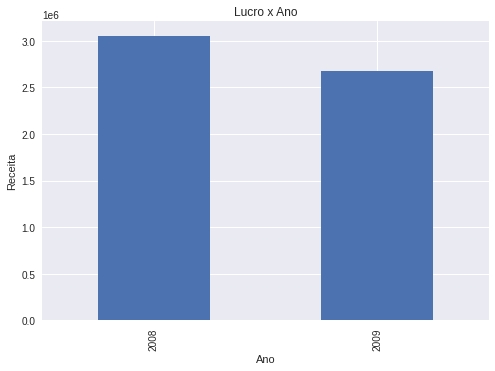

In [256]:

#Mostrando o grafico do total de lucro por ano
dt.groupby(dt["Data Venda"].dt.year)['lucro'].sum().sort_values(ascending=False).plot.bar(title="Lucro x Ano")
plt.xlabel("Ano")
plt.ylabel("Receita");

In [255]:
dt.groupby(dt["Data Venda"].dt.year)['lucro'].sum().sort_values(ascending=False)

Data Venda
2008           3,057,443.12
2009           2,681,269.46
Name: lucro, dtype: float64

In [ ]:
#Selecionando Vendas de 2009

vendas_2019 = dt[dt["Data Venda"].dt.year == 2009]

In [ ]:
# Criando Gráfico de Lucro por Mês 
vendas_2019.groupby(vendas_2019["Data Venda"].dt.month)["lucro"].sum().plot(title="Lucro x Mês no ano de 2019")
plt.xlabel("Mês")
plt.ylabel("Receita");

In [ ]:
# criando grafico do total do lucro por marca em 2009
vendas_2019.groupby("Marca")["lucro"].sum().sort_values(ascending=False).plot.bar(title="Lucro por marca");
plt.xlabel("Marca")
plt.ylabel("Lucro")
plt.xticks(rotation='horizontal');


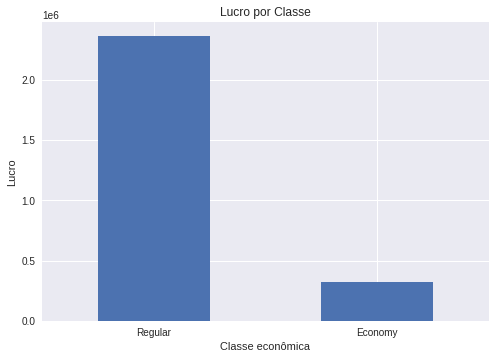

In [383]:
# Lucro por classe no ano de 2009
vendas_2019.groupby("Classe")["lucro"].sum().sort_values(ascending=False).plot.bar(title="Lucro por Classe")
plt.xlabel("Classe econômica")
plt.ylabel("Lucro")
plt.xticks(rotation="horizontal");

In [ ]:
#Dados estatisticos de entrega

dt["Tempo de envio"].describe()

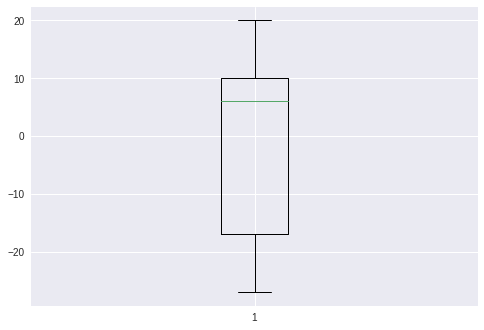

In [401]:
#grafico de plotbox
plt.boxplot(dt["Tempo de envio"]);

In [ ]:
#Grafico histograma
plt.hist(dt["Tempo de envio"]);

In [404]:
#Tempo minino de envio
dt['Tempo de envio'].min()

-27

In [405]:
#Tempo máximo de envio
dt['Tempo de envio'].max()

20

In [407]:
#identificando o Outlier
dt[dt['Tempo de envio'] == 20]

,Data Venda,Data Envio,ID Loja,ID Produto,ID Cliente,No. Venda,Custo Unitário,Preço Unitário,Quantidade,Valor Desconto,Valor Venda,Produto,Fabricante,Marca,Classe,Cor,lucro,Tempo de envio
0,2008-05-09,2008-05-29,199,384,18839,200805093CS607,348.58,758.00,6,0.00,"4,548.00",Adventure Works Laptop15.4W M1548 Red,Adventure Works,Adventure Works,Regular,Red,"4,199.42",20


In [408]:
#Salvando em csv

dt.to_csv("Vendas_2019.csv",index=False)